### [1] 멀티레이블의 정의

-

In [22]:
import random
import numpy as np
import MyModule

# x,y 자료만 만들었고, train, test 구별하지 않았음.
# 웃는 표정과 웃지 않는 표정만 있는게 아니라 멀티레이블이기 때문에, 데이터셋 나누는게 쉽지 않다.
# y데이터가 편향 없이 잘 나누어졌다고 생각이 들면, 작업을 진행해도 된다.
# DataFrame 구조로 보고 잘 나눠봐야 한다.

# 하지만 제일 중요한건 데이터의 양으로 밀어 붙히면 된다.
# train test 로 나눠서 작업은 진행하지만 답은 아니다.


In [46]:
from sklearn.model_selection import train_test_split

# npz 파일 로드

tmp = np.load('small_celeba.npz')

#list(tmp) # list로 확인

X, y = tmp['Xdata'], tmp['yData']

y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [1, 1],
       [0, 1]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y) # 8대 2로 분류

# 난 왜 되는거지??????????????? 되는것도 빡치넹?



In [48]:
np.shape(X_train) # MyModule 에서 불러온 함수.

(4000, 100, 80, 3)

In [26]:
shape(y_train) # MyModule 에서 불러온 함수.

NameError: name 'shape' is not defined

In [49]:
### X_train, y_train, X_test, y_test 자료 사이즈 확인 할것
# y_train 중에서도 male의 남녀 갯수 분포도(갯수), y_test 남여분포도(갯수)
# 같은 방법으로 smile 웃음여부분포도(갯수), y_train의 웃음여부분포도(갯수)확인 할것

import pandas as pd

df_train = pd.DataFrame(y_train, columns=['Male','smile'])
df_test = pd.DataFrame(y_test, columns=['Male','smile'])

df_train.value_counts(), df_test.value_counts()

(Male  smile
 0     1        1278
       0        1056
 1     0        1019
       1         647
 dtype: int64,
 Male  smile
 0     1        319
       0        264
 1     0        255
       1        162
 dtype: int64)

In [ ]:
# #shape를 보는 함수
# def shape(*var):
#     for x in var:
#         print(np.shape(x))

# shape(X_train, y_train, X_test, y_test) 

# #type을 보는 함수
# def type(*var):
#     for x in var:
#         print(x.dtype)

# type(X_train, y_train, X_test, y_test) 

# #데이터의 range를 확인하는 함수
# def range(*var):
#     for x in var:
#         print(x.min(),'~',x.max())
# range(X_train, y_train, X_test, y_test)

In [50]:
# 자료의 편향성을 조사하는 함수

male_train, smile_train = y_train[:,0],y_train[:,1]
male_test, smile_test = y_test[:,0],y_test[:,1]

### 멀티레이블을 위한 y값 제작

#### y값이 2개, 2개를 00, 01, 10, 11 로 나눠서 학습 해야 하나?
#### 

### [미션1] (y값 원핫인코딩)

y_train의 0번 열을 원핫인코딩하여서 train_male_labels 변수에 할당
y_test의 0번 열을 원핫인코딩하여서 test_male_labels 변수에 할당

y_train의 1번 열을 원핫인코딩하여서 train_smile_labels 변수에 할당
y_test의 1번 열을 원핫인코딩하여서 test_smile_labels 변수에 할당

출력 예) 0값은 [1.,0.] 1값은 [0.,1.]로 출력됨



In [51]:
df['Male']

NameError: name 'df' is not defined

In [52]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

### [미션1] (y값 원핫인코딩)
train_male_labels = tf.keras.utils.to_categorical(y_train[:,0])
test_male_labels = tf.keras.utils.to_categorical(y_test[:,1])

train_smile_labels = tf.keras.utils.to_categorical(y_train[:,1])
test_smile_labels = tf.keras.utils.to_categorical(y_test[:,1])


(array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]], dtype=float32))

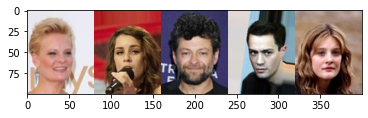

In [53]:
### [미션2] y값과 이미지 확인
import matplotlib.pyplot as plt

plt.imshow(np.hstack(X_train[:5]))
train_male_labels[:5], train_smile_labels[:5]

In [ ]:
### [미션2] y값과 이미지 확인
# import matplotlib.pyplot as plt

# plt.imshow(np.hstack(X_train[:5]))
# train_male_labels[:5], train_smile_labels[:5]


In [54]:
shape(train_male_labels, test_male_labels, train_smile_labels, test_smile_labels)

NameError: name 'shape' is not defined

In [55]:
train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis=1)
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis=1)
#train_labels2=np.concatenate([train_male_labels,train_smile_labels], axis=1)

train_labels2[:5], test_labels2[:5]

(array([[1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 0., 1., 0.]], dtype=float32),
 array([[0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.]], dtype=float32))

In [56]:
train_labels2  # X_train , X_test 

array([[1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.]], dtype=float32)

In [ ]:
# train_male_labels , test_male_labels  : 성별 원핫 인코딩
# train_smile_labels, test_male_labels : 웃음여부만 원핫 인코딩
--------------------------------------------------------------------------------
# train_labels2, test_labels2 : 성별, 웃음 여부의 원핫인코딩된 4개의 비트로 구성
--------------------------------------------------------------------------------
# 모델 구성 Conv2D
# x = (Conv2D)
# x = (ma (x))
--------------------------------------------------------------------------------

# 함수형 모델로 작업
# 맨 위에 tf.keras. 같은 작업을 함수로 미리 해준다.
# from keras.models import Model
# from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten

    # def simple_model():
        # inputs = input(( 218, 178, 3)) #178(너비), 218(높이), 3(채널)
        # shape 단위로 넣어야 한다.
        # x = Conv2D(32, 3, activation = 'relu')(inputs)
        # x = MaxPool2D(2)(x)
        # x = Conv2D(32, 3, activation = 'relu')(x)
        # x = MaxPool2D(2)(x)
        # 위 계층은 여러번 반복 가능

        # 중간에 펼쳐줘야 하기 때문에 Flatten
        # 중간에 x = Flatten()(x) 

        # 마지막 아웃풋은
        # outputs = Dens(2, activation = 'softmax')  #sigmoid 는 한가지 값을 정할때 # Dens = 2인 이유는 성별, 웃음 2개로 봤기 때문에
        # 



In [57]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten

def simple_model():
    inputs = Input((100,80, 3))
    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [58]:
range(X_train, X_test)

TypeError: only integer scalar arrays can be converted to a scalar index

In [59]:
X_train = X_train/255. # 꼭 255 로 나누진 않고 데이터를 중간값으로 나눌수도 있다, 명암이 높아짐, 꼭 칼라를 유지 해야되는거 아니면,
X_test = X_test/255.

In [60]:
#  simple_model() 모델을 2번 할당 받고 서머리를 출력,
# 왜 2번이냐, 젠더 모델, 스마일 모델 2번, valid


gender_model = simple_model()
gender_model.compile(loss='categorical_crossentropy', 
                    optimizer = 'adam',
                    metrics = ['accuracy'])

gender_hist = gender_model.fit(X_train, train_male_labels, 
                               validation_data =(X_test,test_male_labels), 
                               epochs=10,
                              verbose = 1)

Epoch 1/10
125/125 [==============================] - 8s 64ms/step - loss: 0.5580 - accuracy: 0.7125 - val_loss: 1.1488 - val_accuracy: 0.4670
Epoch 2/10
125/125 [==============================] - 8s 63ms/step - loss: 0.3642 - accuracy: 0.8380 - val_loss: 2.0738 - val_accuracy: 0.4460
Epoch 3/10
125/125 [==============================] - 8s 64ms/step - loss: 0.2246 - accuracy: 0.9128 - val_loss: 2.4627 - val_accuracy: 0.4080
Epoch 4/10
125/125 [==============================] - 8s 63ms/step - loss: 0.1740 - accuracy: 0.9350 - val_loss: 2.9576 - val_accuracy: 0.4190
Epoch 5/10
125/125 [==============================] - 8s 67ms/step - loss: 0.1287 - accuracy: 0.9532 - val_loss: 3.0660 - val_accuracy: 0.4200
Epoch 6/10
125/125 [==============================] - 10s 78ms/step - loss: 0.1080 - accuracy: 0.9628 - val_loss: 3.2766 - val_accuracy: 0.4340
Epoch 7/10
125/125 [==============================] - 10s 77ms/step - loss: 0.0902 - accuracy: 0.9640 - val_loss: 4.0562 - val_accuracy: 0.42

In [61]:
gender_model.evaluate(X_test, test_male_labels)

32/32 [==============================] - 0s 15ms/step - loss: 6.2333 - accuracy: 0.4300


[6.233316421508789, 0.4300000071525574]

In [ ]:
#gender_hist = gender_model.fit(X_train/255., train_male_labels, validation_data =(X_test/255.,test_male_labels), epochs=10)

In [62]:

smile_model = simple_model()
smile_model.compile(loss='categorical_crossentropy', 
                    optimizer = 'adam',
                    metrics = ['accuracy'])


smile_hist = smile_model.fit(X_train, train_smile_labels, 
                             validation_data =(X_test,test_smile_labels), 
                             epochs=10,
                            verbose = 1)

Epoch 1/10
125/125 [==============================] - 8s 62ms/step - loss: 0.6798 - accuracy: 0.5565 - val_loss: 0.6180 - val_accuracy: 0.6360
Epoch 2/10
125/125 [==============================] - 8s 61ms/step - loss: 0.4910 - accuracy: 0.7642 - val_loss: 0.3492 - val_accuracy: 0.8580
Epoch 3/10
125/125 [==============================] - 8s 62ms/step - loss: 0.3032 - accuracy: 0.8698 - val_loss: 0.3051 - val_accuracy: 0.8650
Epoch 4/10
125/125 [==============================] - 9s 69ms/step - loss: 0.2502 - accuracy: 0.8972 - val_loss: 0.3028 - val_accuracy: 0.8640
Epoch 5/10
125/125 [==============================] - 9s 73ms/step - loss: 0.2308 - accuracy: 0.9015 - val_loss: 0.2852 - val_accuracy: 0.8720
Epoch 6/10
125/125 [==============================] - 9s 73ms/step - loss: 0.2118 - accuracy: 0.9103 - val_loss: 0.3138 - val_accuracy: 0.8650
Epoch 7/10
125/125 [==============================] - 9s 73ms/step - loss: 0.1878 - accuracy: 0.9208 - val_loss: 0.2706 - val_accuracy: 0.8930

In [64]:
smile_model.evaluate(X_test, test_smile_labels)

32/32 [==============================] - 0s 15ms/step - loss: 0.3345 - accuracy: 0.8860


[0.33453550934791565, 0.8859999775886536]

새로운 이미지를 불러오고.

resize하고 ((179, 218)) = > (218, 178) 로 쉐입을 맞추고
./255로 나누고 난뒤

reshape(1, 218,178, 3) 해서
gender_model에서 작업

차트로도 그려서 어떤 부분이 잘되는지 안되는지 확인해볼것

In [65]:
acc = smile_hist.smile_hist['accuracy']
val_acc = smile_hist.smile_hist['val_accuracy']

loss=smile_hist.smile_hist['loss']
val_loss=smile_hist.smile_hist['val_loss']

epochs_range = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

AttributeError: 'History' object has no attribute 'smile_hist'

## 멀티 아웃풋 모델링

y 값을 성별과 웃음이 들어간 4bit 짜리의 원핫인코딩 자료로 작업하려함


In [67]:
#y 값을 성별과 웃음이 들어간 4bit 짜리의 원핫인코딩 자료로 작업하려함#

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten, Concatenate


def model():
    inputs = Input((100,80, 3))
    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    
    
    outputs_gender = Dense(2, activation='softmax')(x)
    outputs_smile = Dense(2, activation='softmax')(x)
    outputs = Concatenate(axis =1)([outputs_gender, outputs_smile])
    model = Model(inputs, outputs)
    return model

model = model()

model.compile(loss='categorical_crossentropy', 
                    optimizer = 'adam',
                    metrics = ['accuracy'])

# 방법 1
history = model.fit(X_train, train_labels2,
                   validation_data = (X_test, test_labels2), epochs =2, verbose =1 )



Epoch 1/2
125/125 [==============================] - 8s 63ms/step - loss: 2.6235 - accuracy: 0.5717 - val_loss: 3.0907 - val_accuracy: 0.3830
Epoch 2/2
125/125 [==============================] - 8s 63ms/step - loss: 2.2664 - accuracy: 0.6750 - val_loss: 3.7188 - val_accuracy: 0.3030


In [70]:
model.evaluate(X_test, test_labels2)

32/32 [==============================] - 1s 15ms/step - loss: 3.7188 - accuracy: 0.3030


[3.718794107437134, 0.30300000309944153]

In [81]:
def model():
    
    inputs = Input((100, 80, 3))
    x = Conv2D(32, 3, activation='relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    
    
    outputs_gender = Dense(2, activation='softmax')(x)
    outputs_smile = Dense(2, activation='softmax')(x)
    outputs = Concatenate(axis =1)([outputs_gender, outputs_smile])
    model = Model(inputs, outputs)
    return model



model = model()

model.compile(loss='categorical_crossentropy', 
                    optimizer = 'adam',
                    metrics = ['accuracy'])
model.summary()


# 방법 2 성별과 웃음의 각 자료를 리스트로 만들어서 리스트 구조로 넣을 수 있음
history = model.fit(X_train,[train_male_labels, train_smile_labels],
                    validation_data = (X_test,[train_male_labels, train_smile_labels]), 
                    epochs =2, 
                    verbose =1)



Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 100, 80, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_57 (Conv2D)             (None, 98, 78, 32)   896         ['input_20[0][0]']               
                                                                                                  
 max_pooling2d_57 (MaxPooling2D  (None, 49, 39, 32)  0           ['conv2d_57[0][0]']              
 )                                                                                                
                                                                                           

ValueError: in user code:

    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\miniconda3\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_17" expects 1 input(s), but it received 3 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 100, 80, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 2) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(32, 2) dtype=float32>]


In [ ]:
#smile_model.fit(X_train, train_smile_labels, validation_data =(X_test,test_smile_labels), epochs=10)